In [ ]:
import migration_detector as md
import matplotlib as mpl
%matplotlib inline

### read trajectory files

In [2]:
traj = md.read_csv('example/migrant_location_history_example1.csv')

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"graphlab.set_runtime_config('GRAPHLAB_DEFAULT_NUM_PYLAMBDA_WORKERS', 56)"

Note that increasing the degree of parallelism also increases the memory footprint.

### plot trajectory

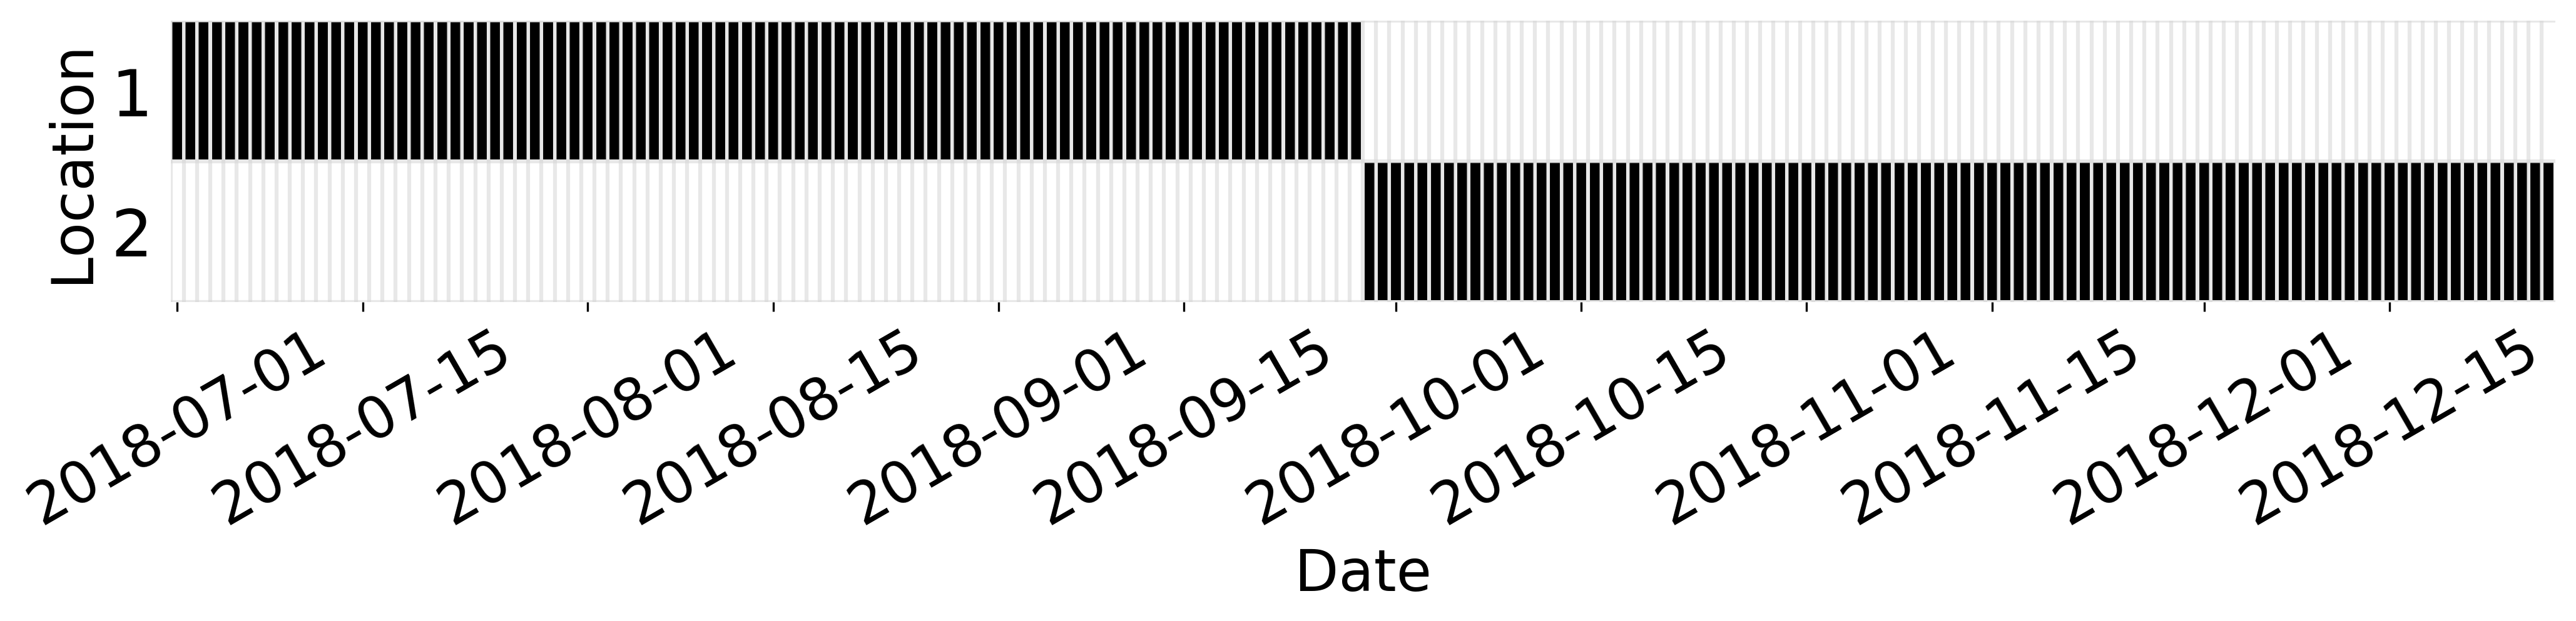

In [3]:
traj.plot_trajectory(user_id='1')

### detect migrants

In [4]:
migrants = traj.find_migrants()
print(migrants['user_id', 'home', 'destination', 'migration_date',
               'uncertainty', 'num_error_day',
               'home_start', 'home_end',
               'destination_start', 'destination_end',
               'home_start_date', 'home_end_date',
               'destination_start_date', 'destination_end_date'])

Start: Detecting migration
Done
+---------+------+-------------+----------------+-------------+---------------+
| user_id | home | destination | migration_date | uncertainty | num_error_day |
+---------+------+-------------+----------------+-------------+---------------+
|    1    |  1   |      2      |    20180929    |     0.0     |      0.0      |
+---------+------+-------------+----------------+-------------+---------------+
+------------+----------+-------------------+-----------------+-----------------+
| home_start | home_end | destination_start | destination_end | home_start_date |
+------------+----------+-------------------+-----------------+-----------------+
|    0.0     |   89.0   |        90.0       |      179.0      |     20180701    |
+------------+----------+-------------------+-----------------+-----------------+
+---------------+------------------------+----------------------+
| home_end_date | destination_start_date | destination_end_date |
+---------------+---------

### output segments

In [5]:
# the segments in the first and second step can also be saved by assigning which_step=1 or 2
traj.output_segments(segment_file='segments.csv', which_step=3)

### plot the trajectory of a migrant

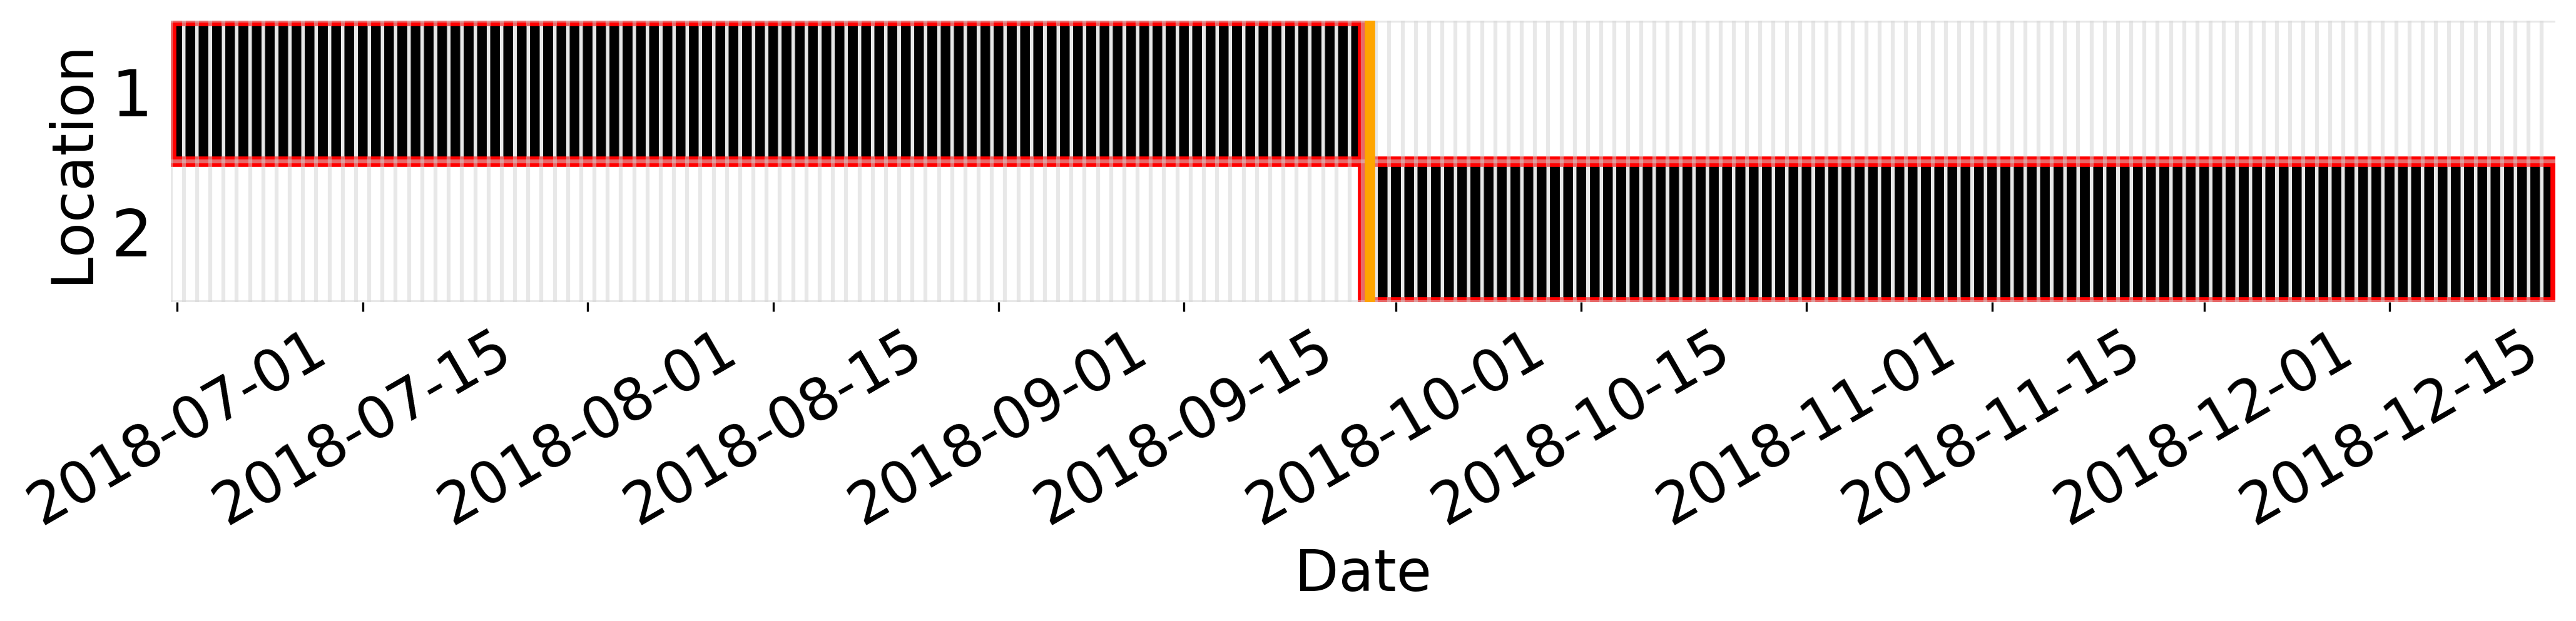

In [6]:
traj.plot_segment(migrants[0], if_migration=True)

### save the result of detected migrants

In [7]:
md.to_csv(migrants, result_path='result', file_name='migration_event.csv')

### plot segments in each step

Start: Detecting migration
Done


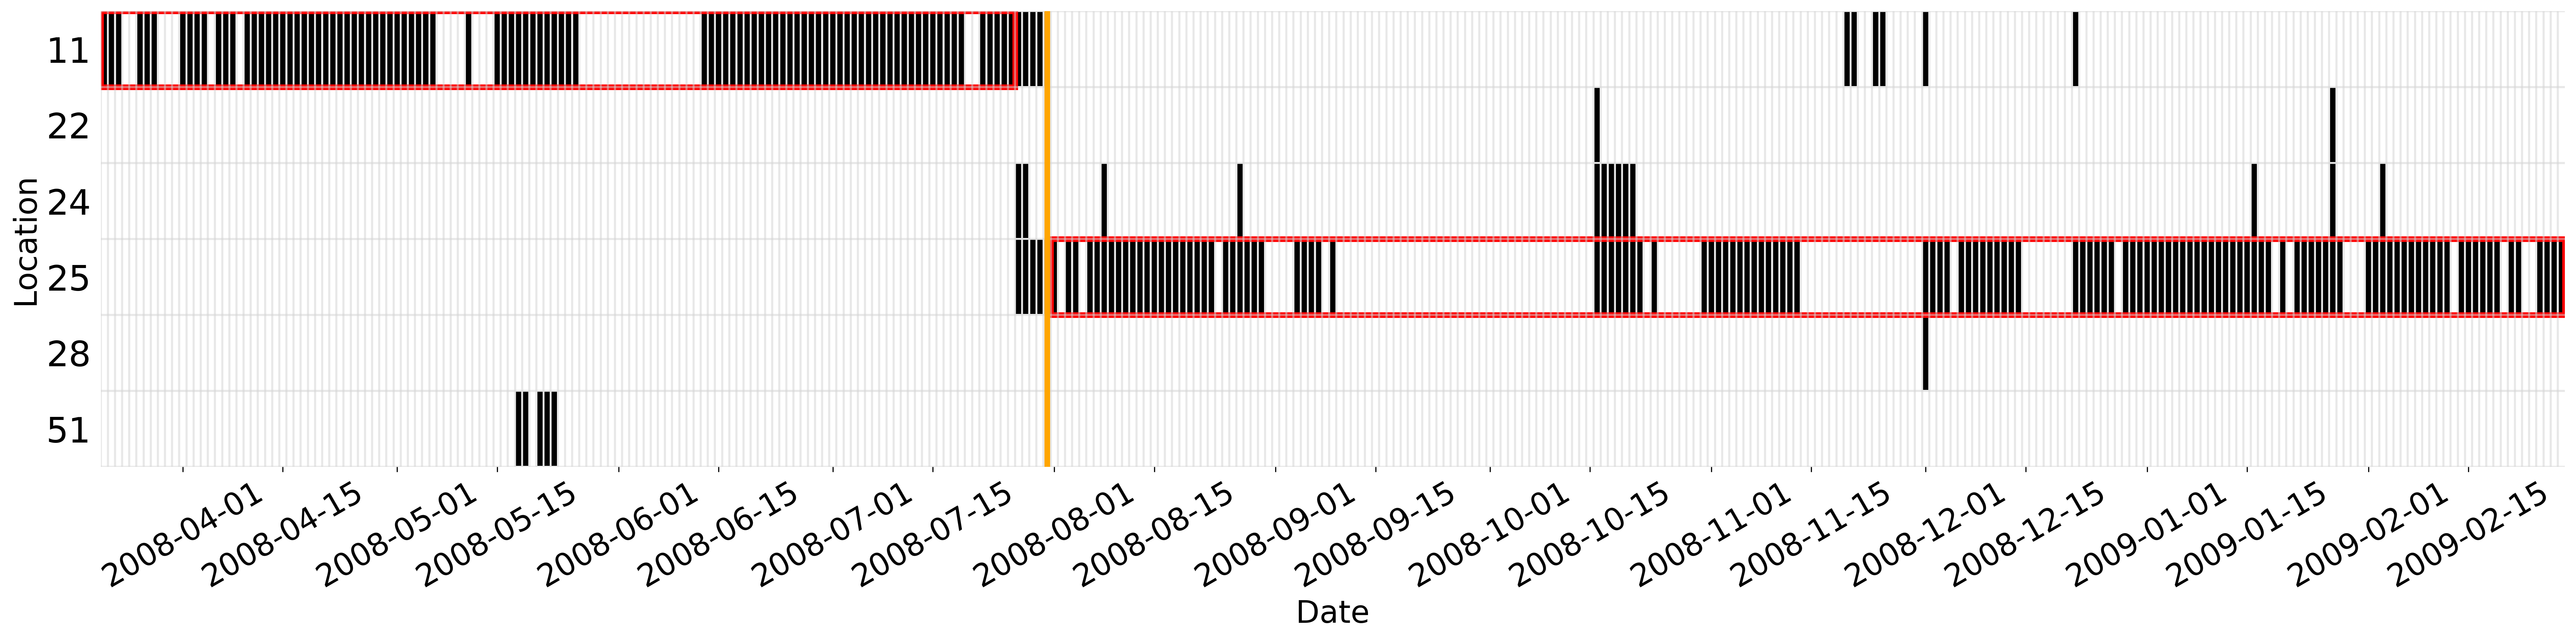

In [8]:
traj1 = md.read_csv('example/migrant_location_history_example3.csv')
migrants = traj1.find_migrants()
traj1.plot_segment(migrants[0], if_migration=True)

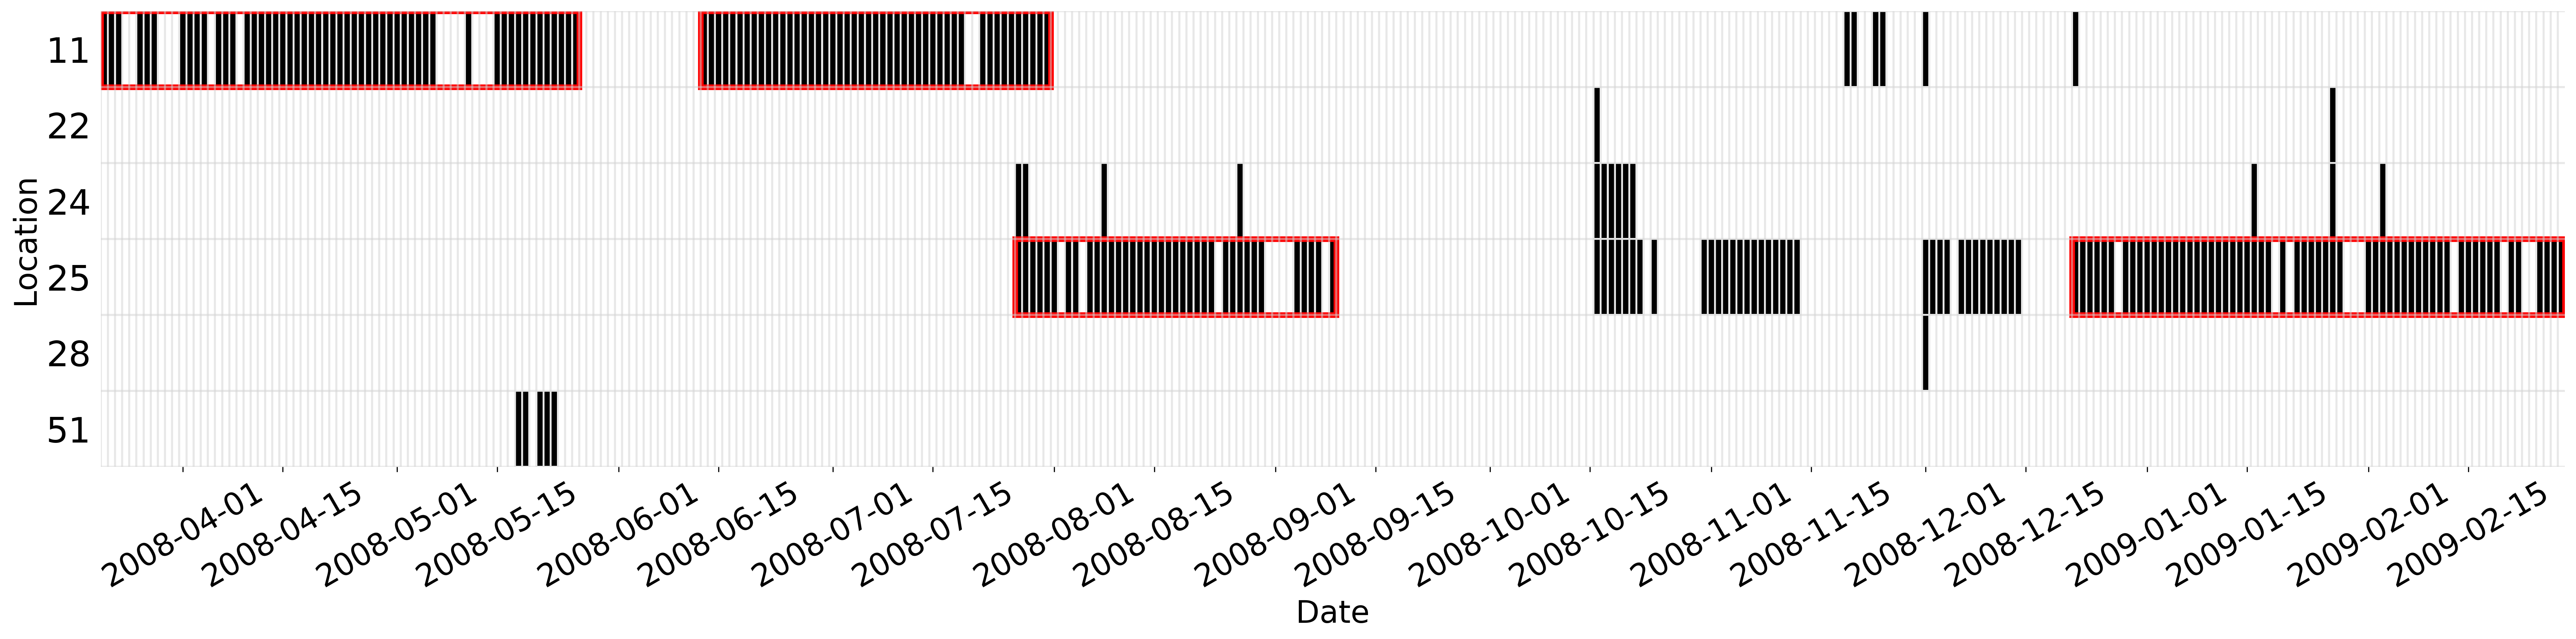

In [9]:
# plot segments detected in the first step
traj1.plot_segment(migrants[0], segment_which_step=1)

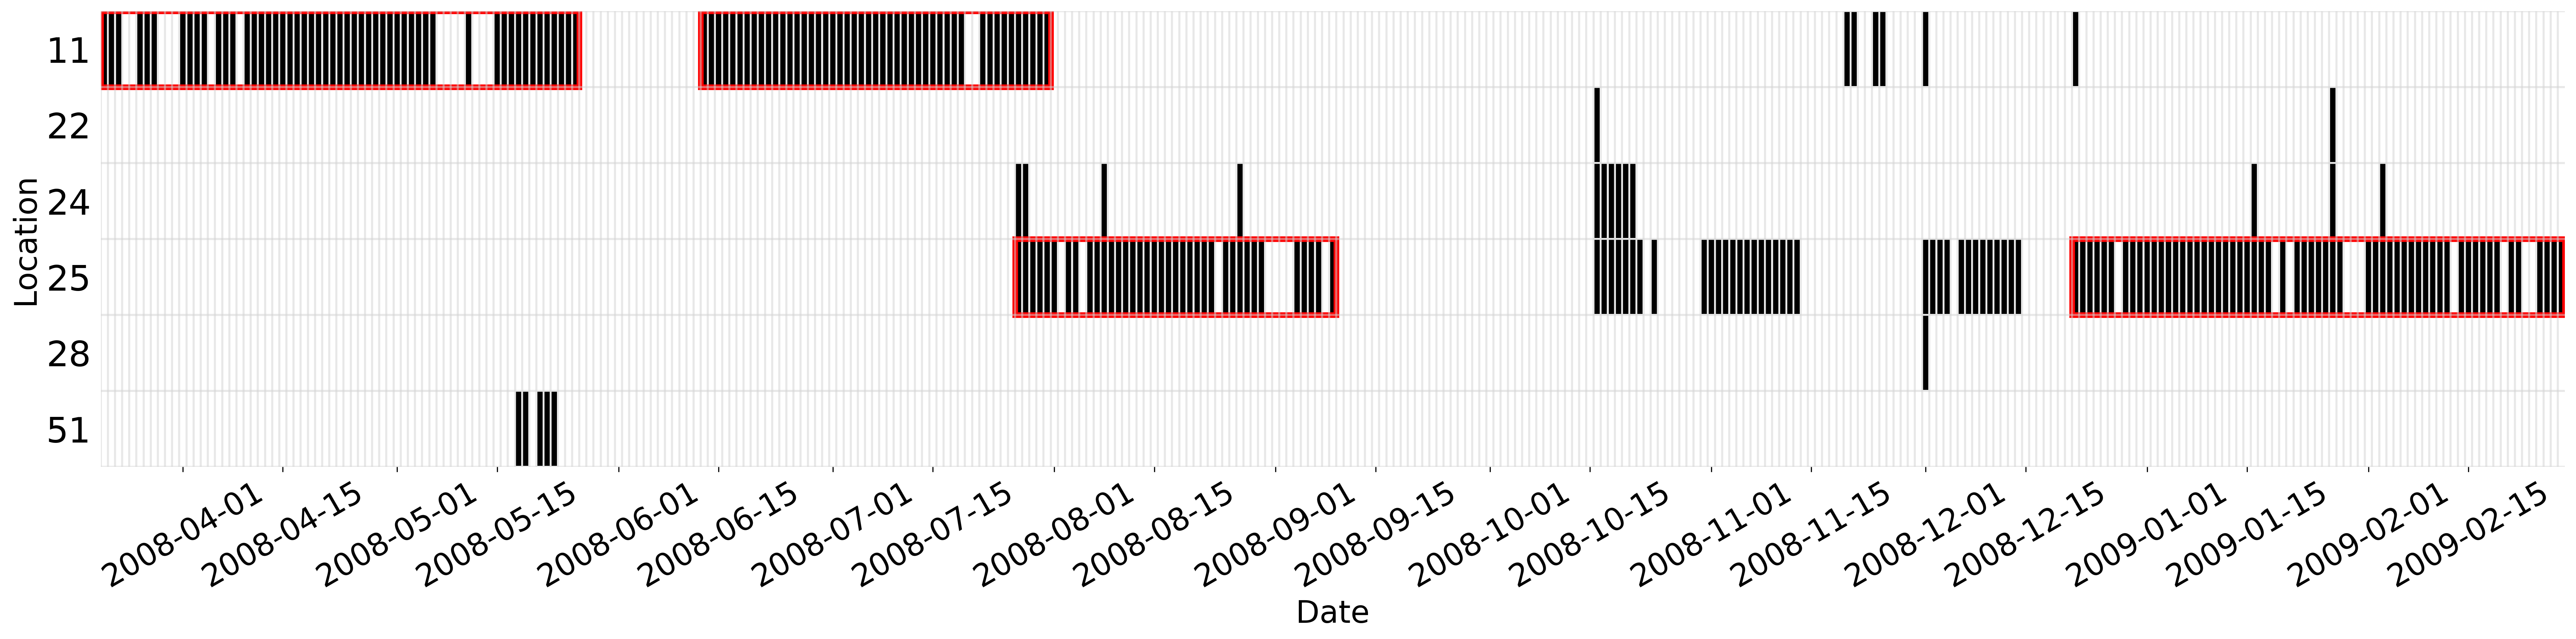

In [10]:
# the second way to plot segments of a user
user_id = '1'
user_result = traj1.user_traj.filter_by(user_id, 'user_id')[0]
traj1.plot_segment(user_result, if_migration=False, segment_which_step=1)

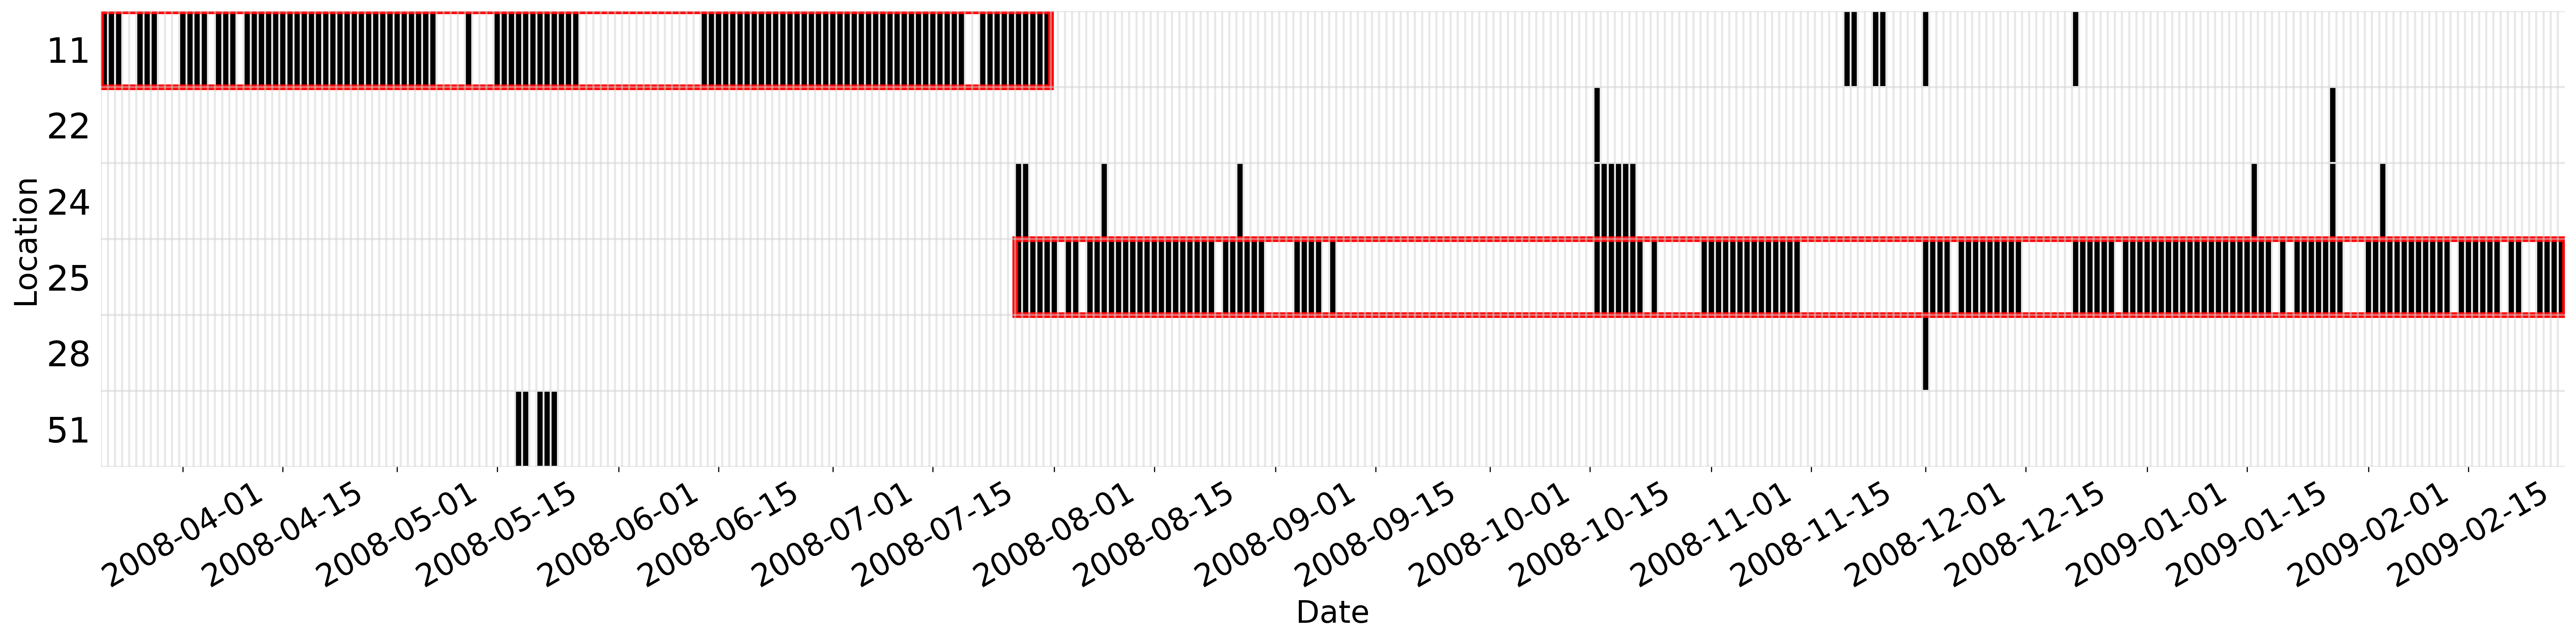

In [11]:
# plot the segments detected in the second step
traj1.plot_segment(migrants[0], segment_which_step=2)

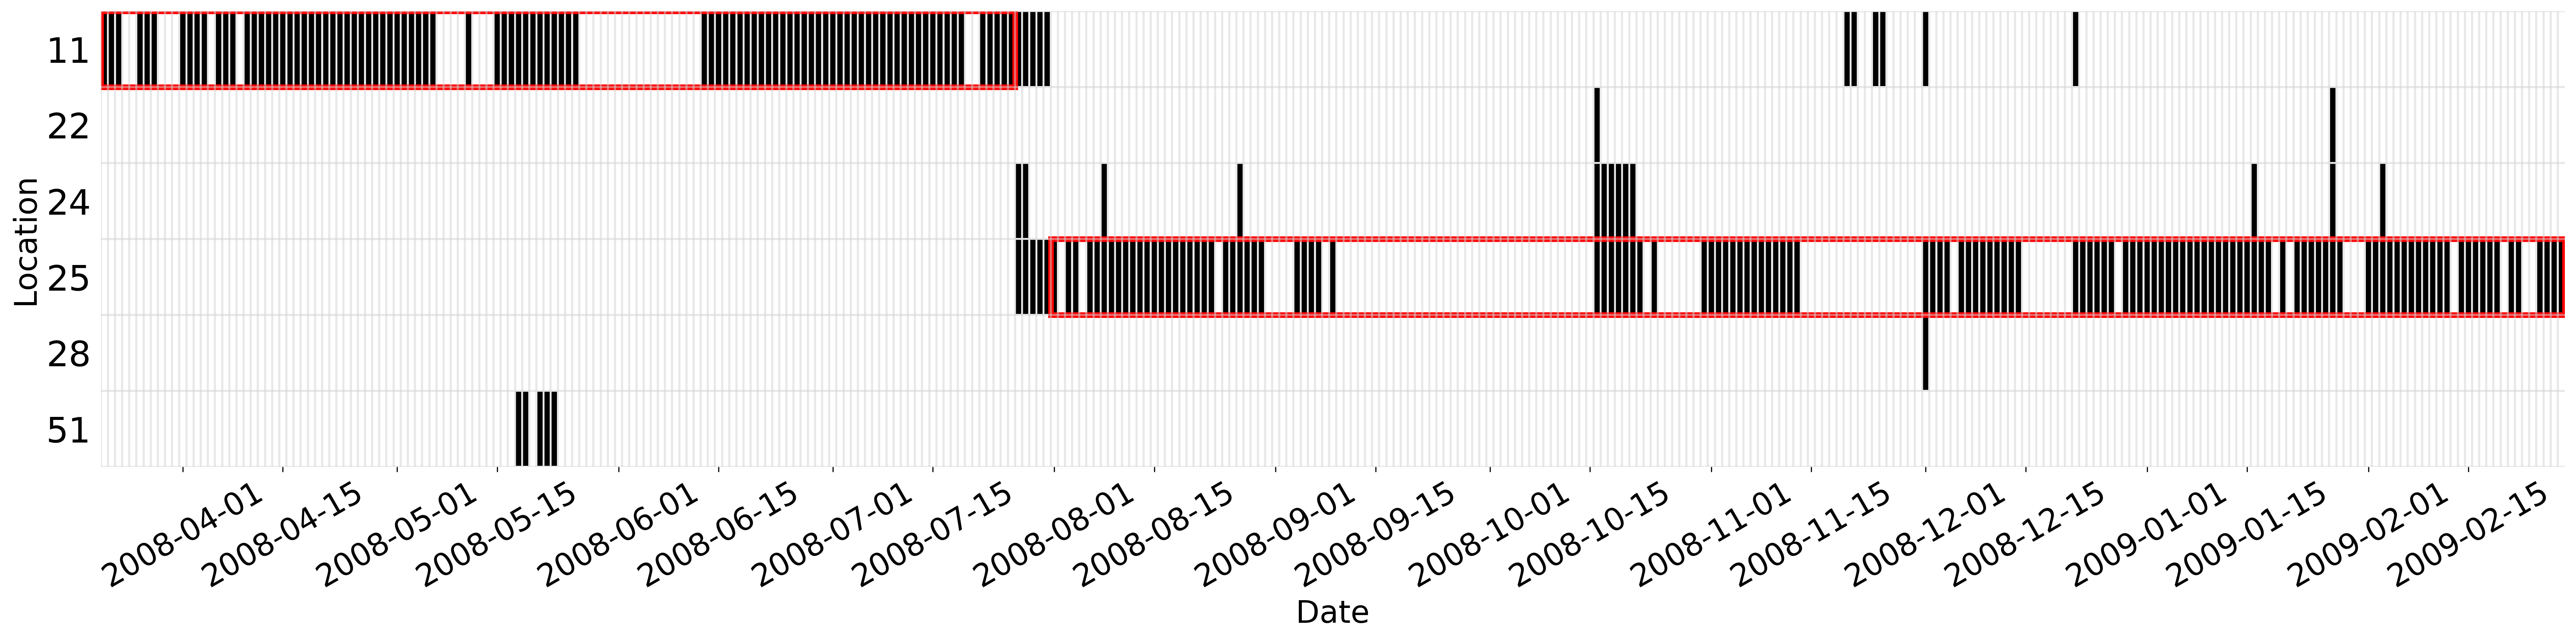

In [12]:
# plot the segments detected in the third step
traj1.plot_segment(migrants[0], segment_which_step=3)

### figures in the paper

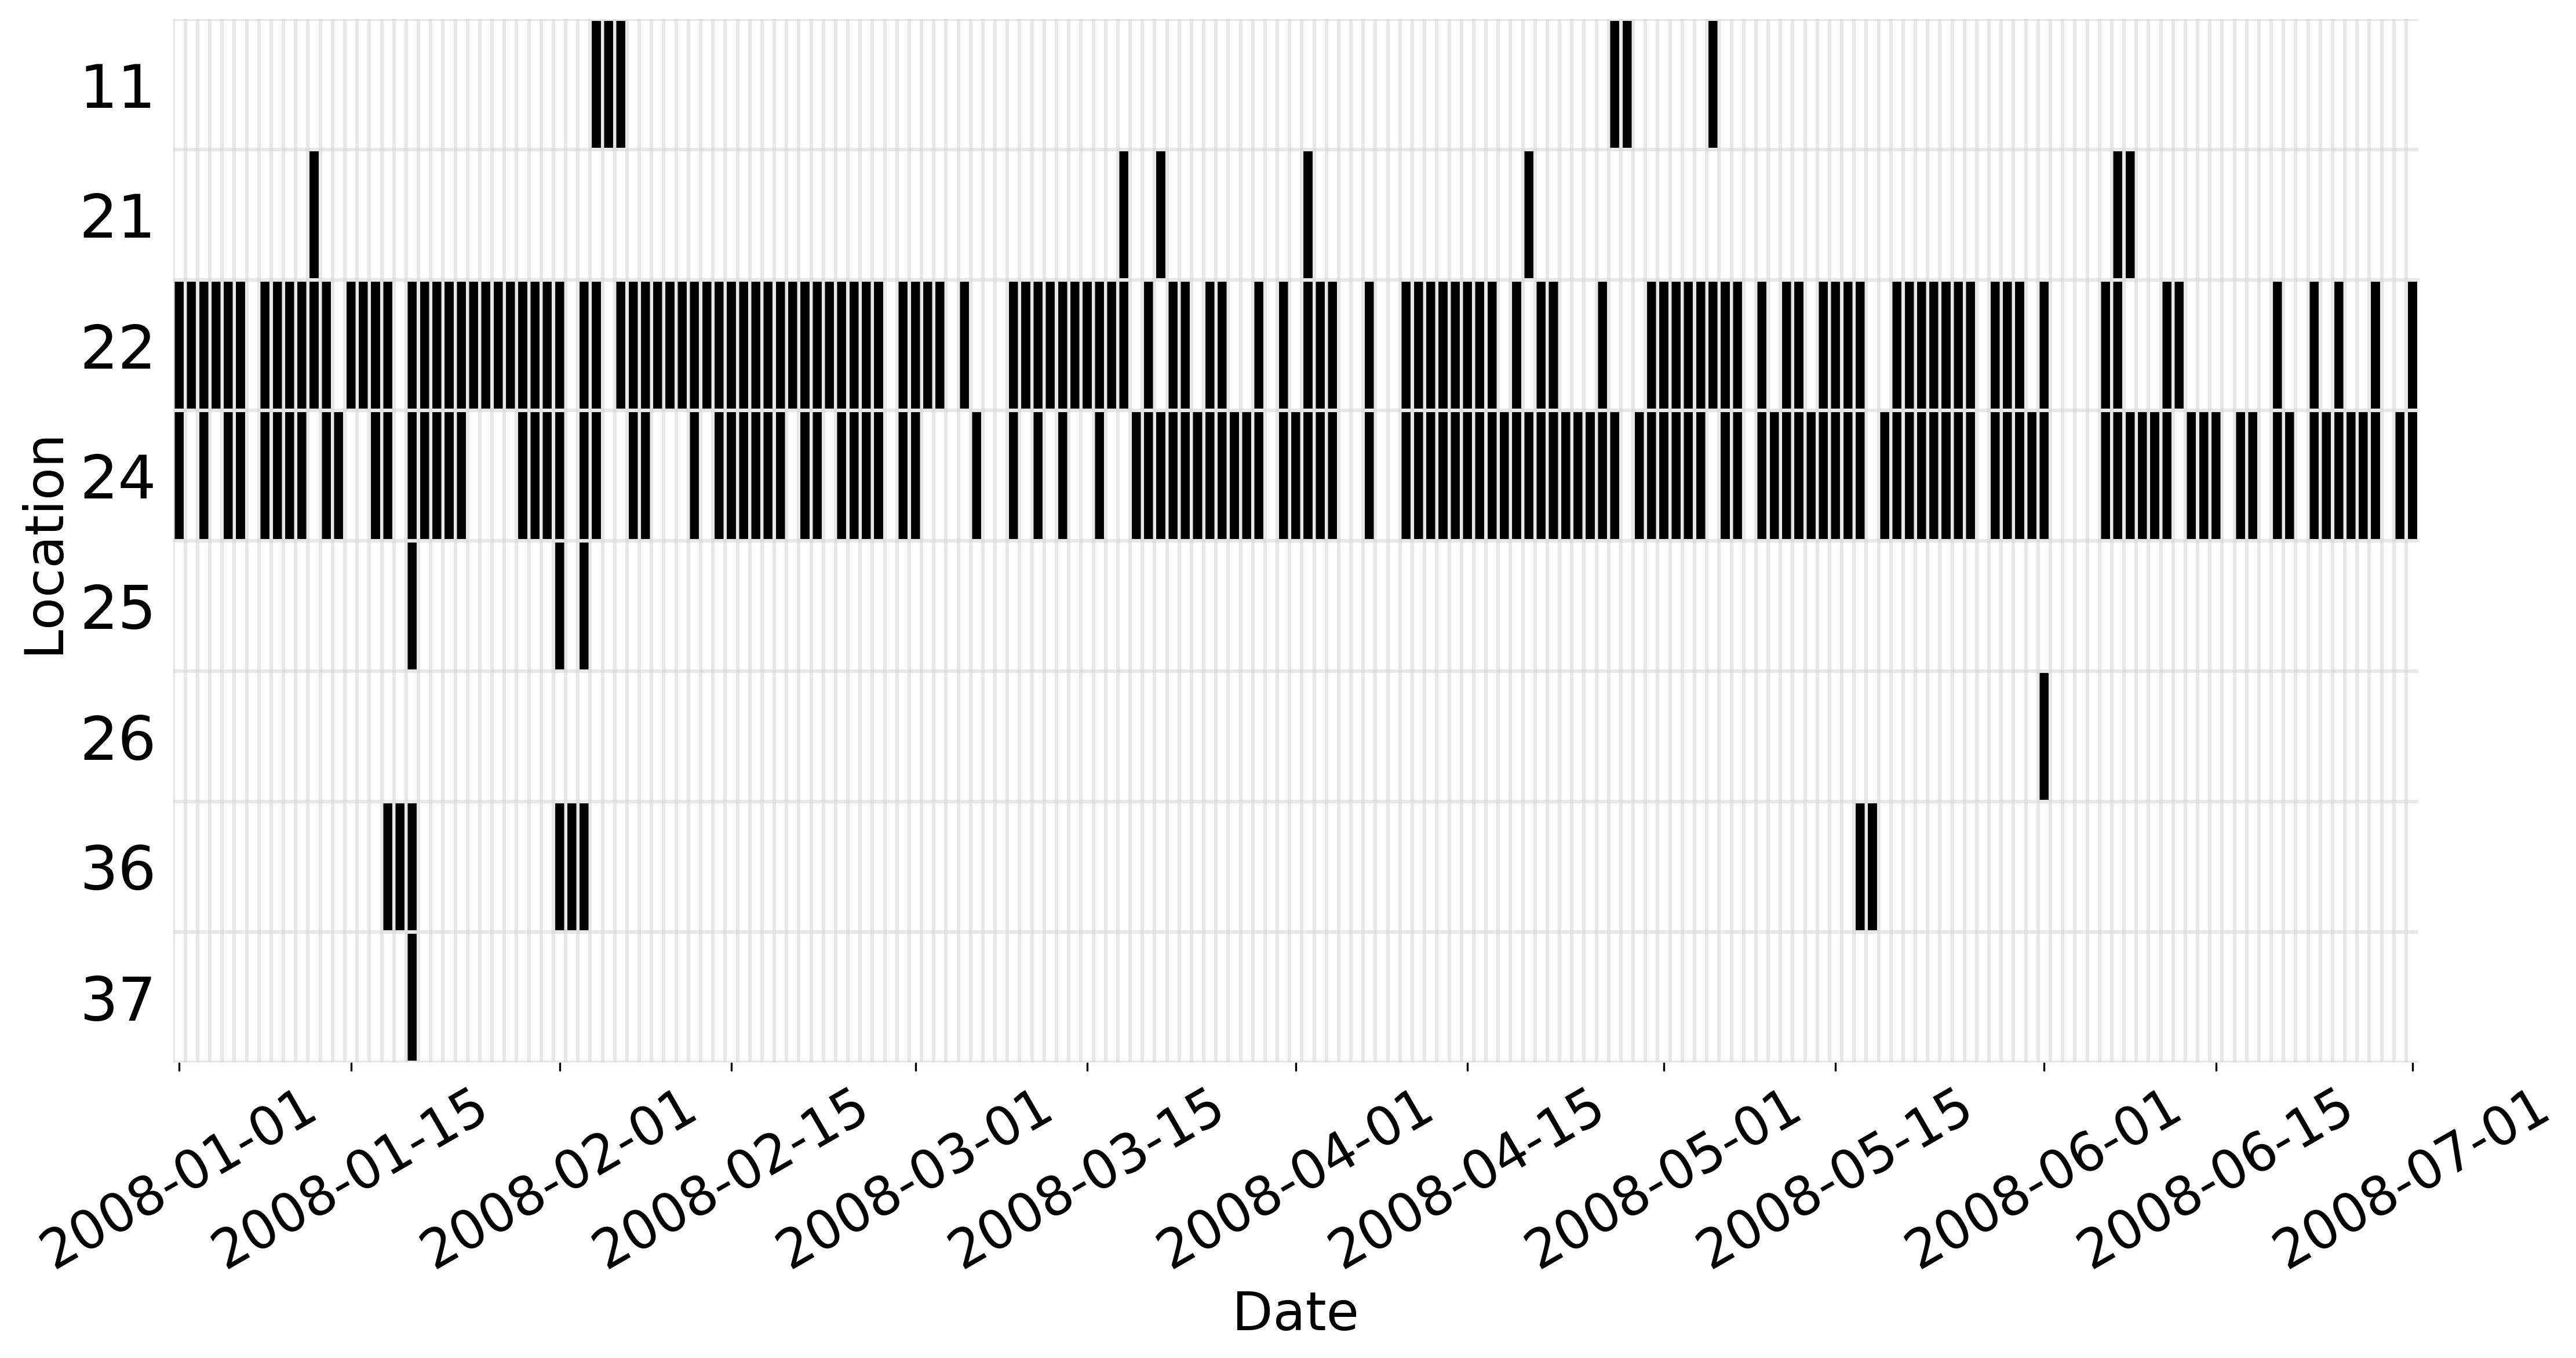

In [13]:
traj2 = md.read_csv('example/fig_2_data.csv')
traj2.plot_trajectory(user_id='1', start_date='20080101')

Start: Detecting migration
Done


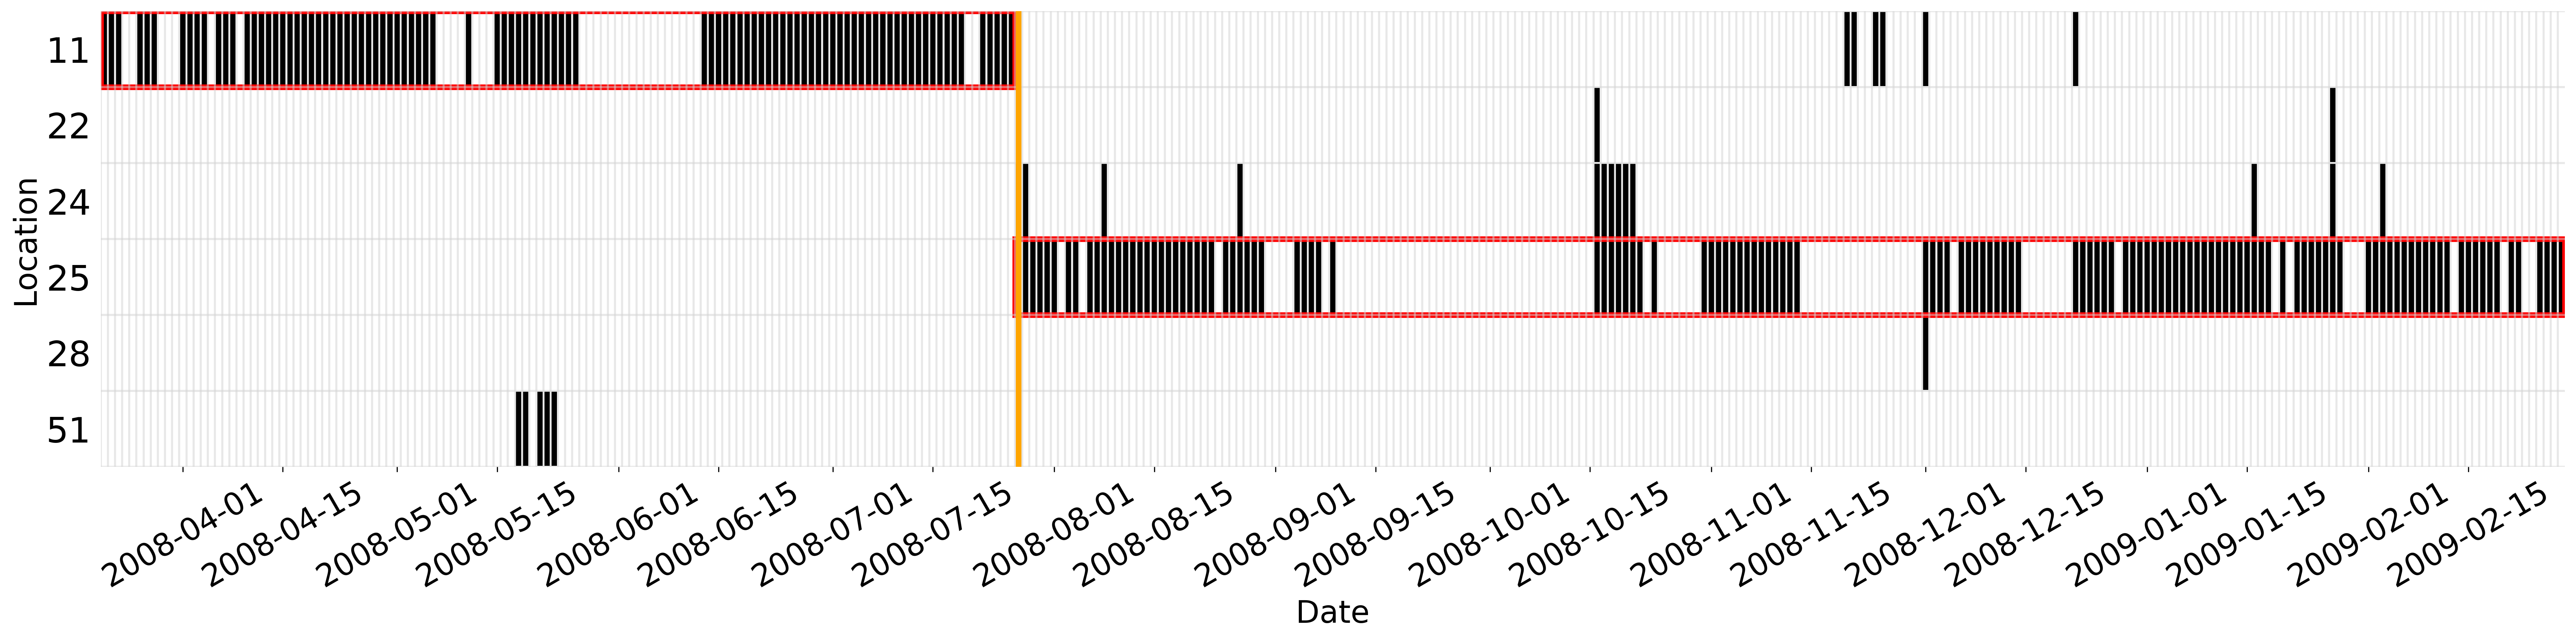

In [14]:
traj3 = md.read_csv('example/fig_4a_data.csv')
migrants = traj3.find_migrants()
traj3.plot_segment(migrants[0], if_migration=True)

Start: Detecting migration
Done


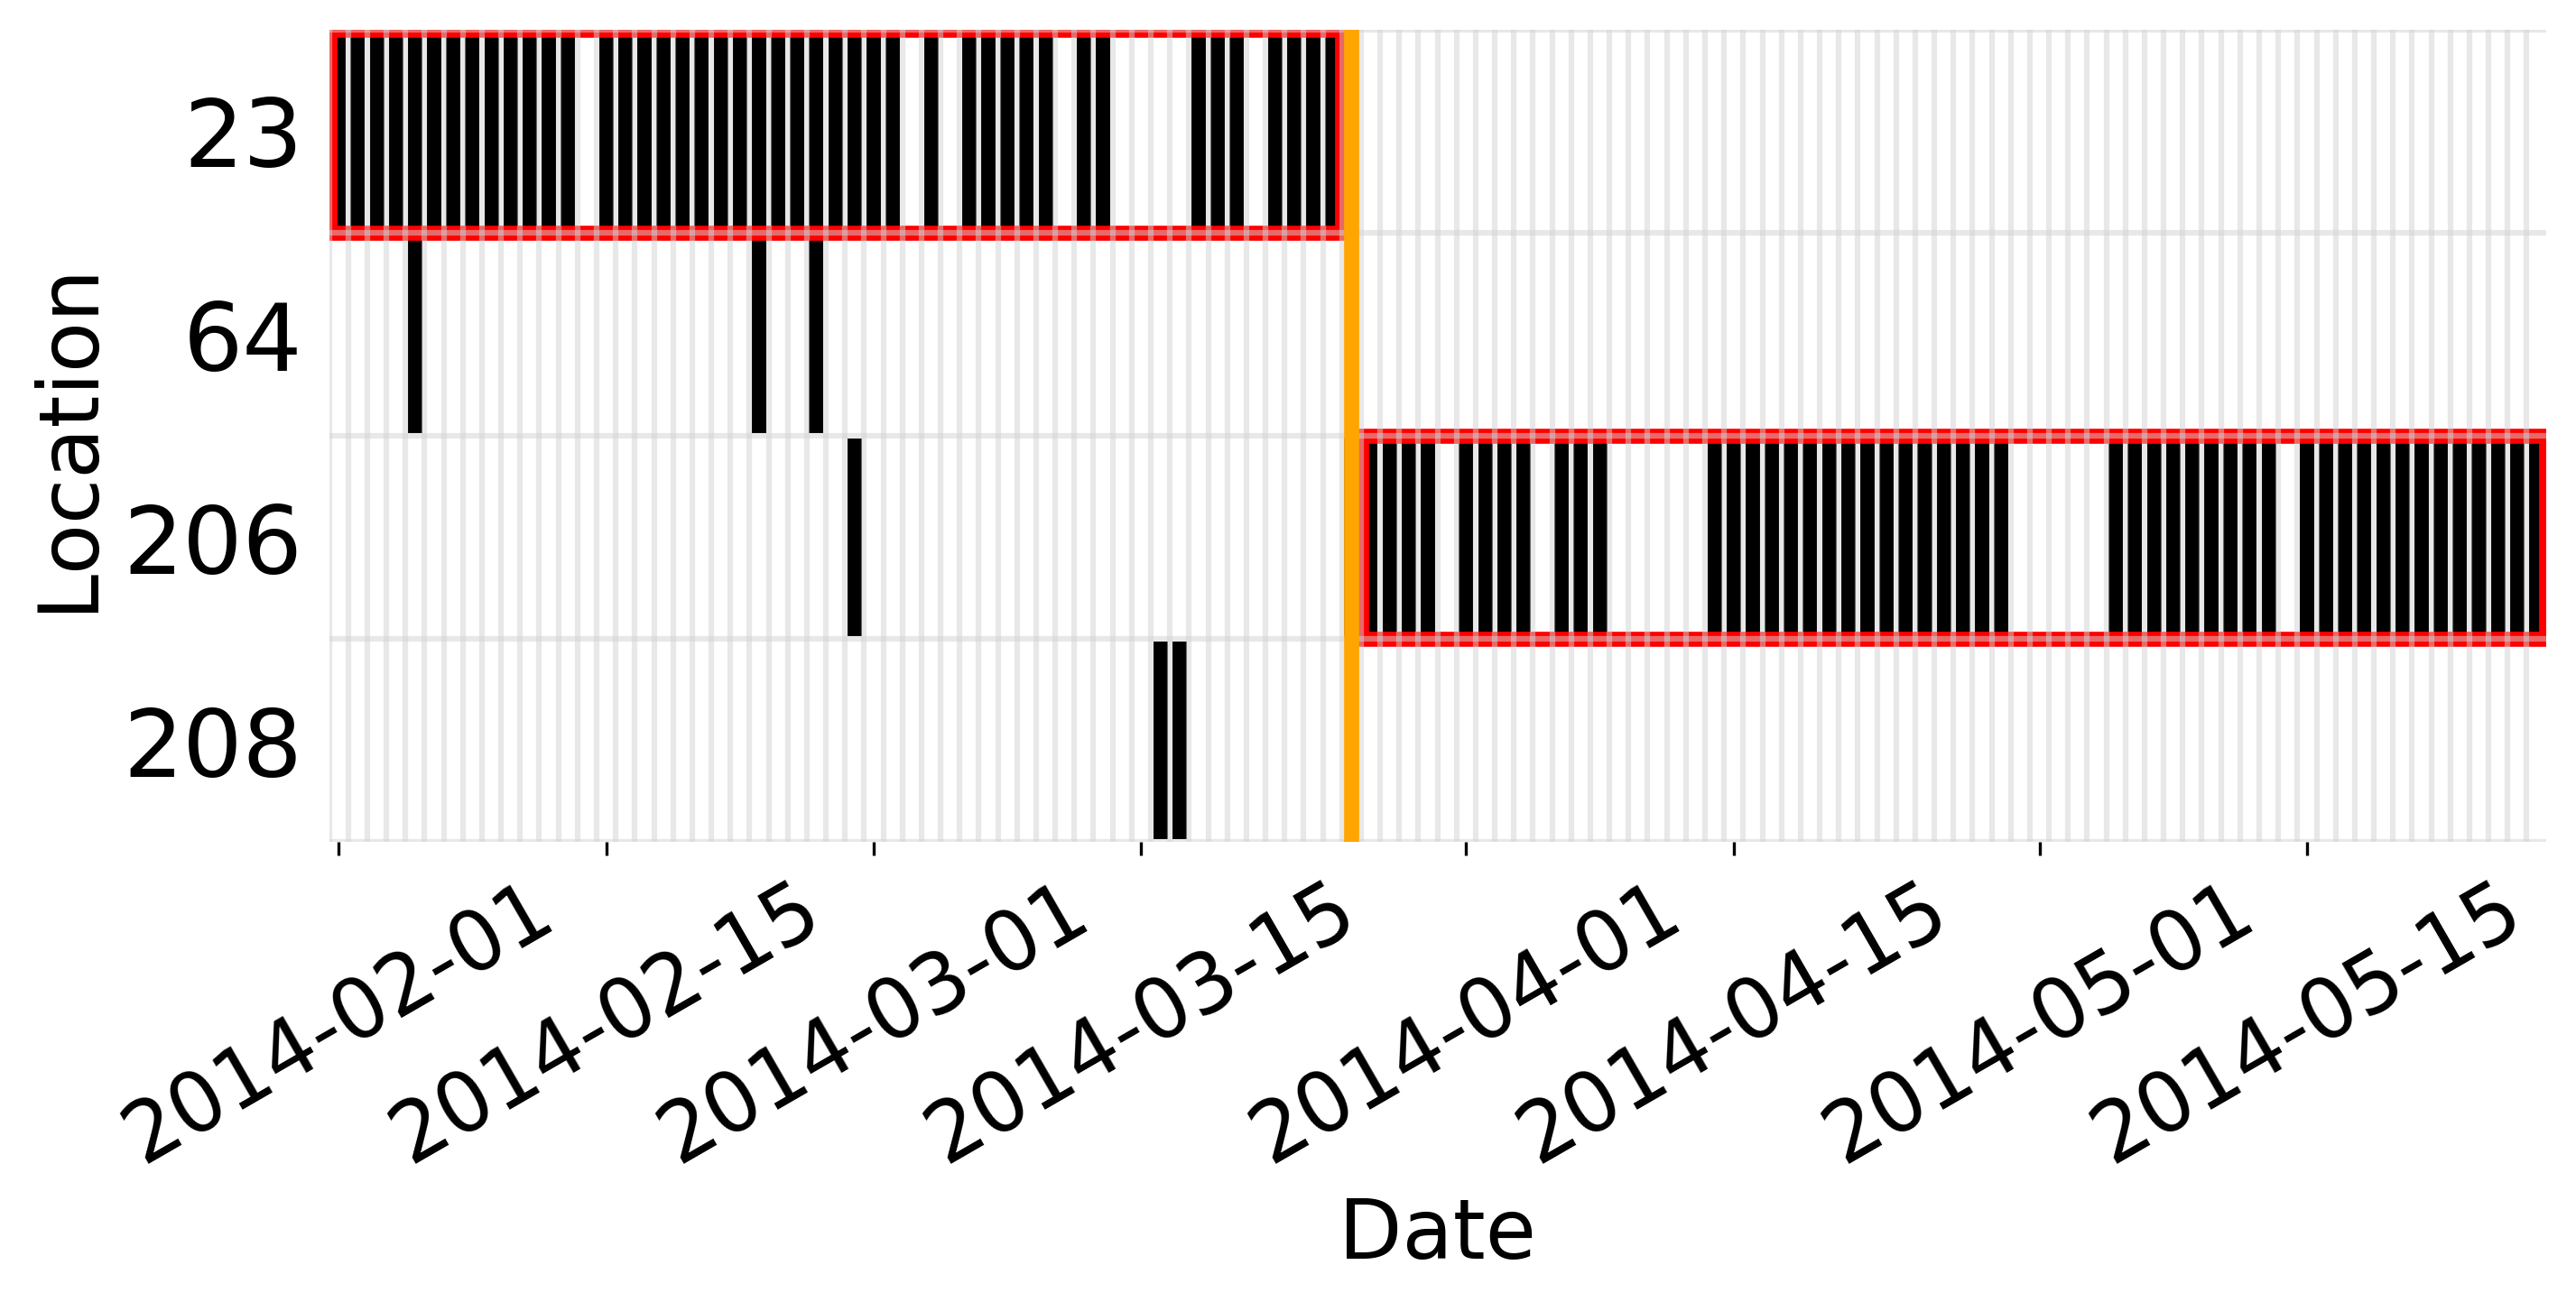

In [15]:
traj4 = md.read_csv('example/fig_4b_data.csv')
migrants = traj4.find_migrants(num_stayed_days_migrant=40)
traj4.plot_segment(migrants[0], if_migration=True)